# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
import TRAIN.architecture.BERT.bert as bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

In [4]:
TRAIN_classes = 'all-classes'

data_config = {
  "data_unit" : sup.DATA_S_PF,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 128,
  "PH2" : False,
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : 72,
}

train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "loadable" : bert.BERT_MINI,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
  "num_epochs" : 6000
}


In [5]:
sup.bert_score_tracker = []

model = bert.BERT(data_config=data_config, df=None, train_config=train_config)

In [6]:
model.df

,class_numeric,h0x,h0y,h0z,h1x,h1y,h1z,h2x,h2y,h2z,...,h20z,p0x,p0y,p0z,p11x,p11y,p11z,p12x,p12y,p12z
0,28,-0.787242,1.010774,-0.751420,-1.075648,0.955576,0.792025,-1.251622,0.770178,0.944624,...,1.377421,0.228771,1.037643,0.160993,0.076142,1.788644,0.110050,0.514112,1.333637,-0.057036
2,28,-0.804200,1.102638,-0.788158,-1.095087,1.030476,0.783797,-1.278922,0.829015,0.904763,...,1.209665,0.196475,0.985550,0.072221,0.087104,1.799165,0.175894,0.438153,1.388307,-0.078844
4,28,-0.823729,1.153242,-0.697513,-1.119107,1.079192,0.838997,-1.309381,0.877911,0.940164,...,1.204289,0.180857,1.039904,-0.075641,0.126535,1.856587,0.026587,0.392688,1.461617,-0.143795
7,28,-0.837763,1.220904,-0.788311,-1.135434,1.137053,0.939467,-1.326641,0.943732,1.033670,...,1.257329,0.268515,1.078551,0.036393,0.076480,1.824523,0.150574,0.357920,1.559459,-0.120172
8,28,-0.843604,1.236339,-0.689832,-1.147192,1.170178,0.520320,-1.349698,0.969767,0.621525,...,1.004101,0.210423,1.039113,-0.408616,0.102015,1.769265,-0.390625,0.392666,1.540499,-0.471164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91742,27,1.267918,0.682857,-1.556307,1.224472,0.742091,-0.704763,1.176433,0.743854,-0.833640,...,0.365039,-0.383996,0.519381,0.266405,-0.113142,0.977225,0.740513,-0.653456,1.198829,0.485849
91744,27,1.266302,0.691590,-1.523390,1.219320,0.785415,-0.878137,1.162470,0.827290,-1.032559,...,0.190548,-0.343543,0.539873,0.202076,-0.122127,1.011829,0.692896,-0.687217,1.205512,0.426391
91746,27,1.235307,0.655466,-1.703780,1.220144,0.750916,-1.438989,1.164861,0.795948,-1.637628,...,0.095872,-0.315187,0.542588,0.174883,-0.075284,1.038974,0.663724,-0.702345,1.190133,0.298458
91747,27,1.249075,0.697420,-1.611310,1.252767,0.765981,-1.185100,1.235229,0.739744,-1.329221,...,-0.133730,-0.371640,0.479025,0.280445,-0.139595,1.032329,0.861741,-0.772607,1.217416,0.371163


In [ ]:
model.fit(verbose=True)

Training:   8%|▊         | 500/6000 [1:09:17<12:49:49,  8.40s/epoch, epoch=500, loss=35.4]

In [ ]:
model.test()
model.full_score()

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:205: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.loss_fig.show()


0.6472284524190964
0.83327993164584
0.6388565607393739
0.6551160628952094
0.6469428295511196


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:247: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.confusion_fig.show()


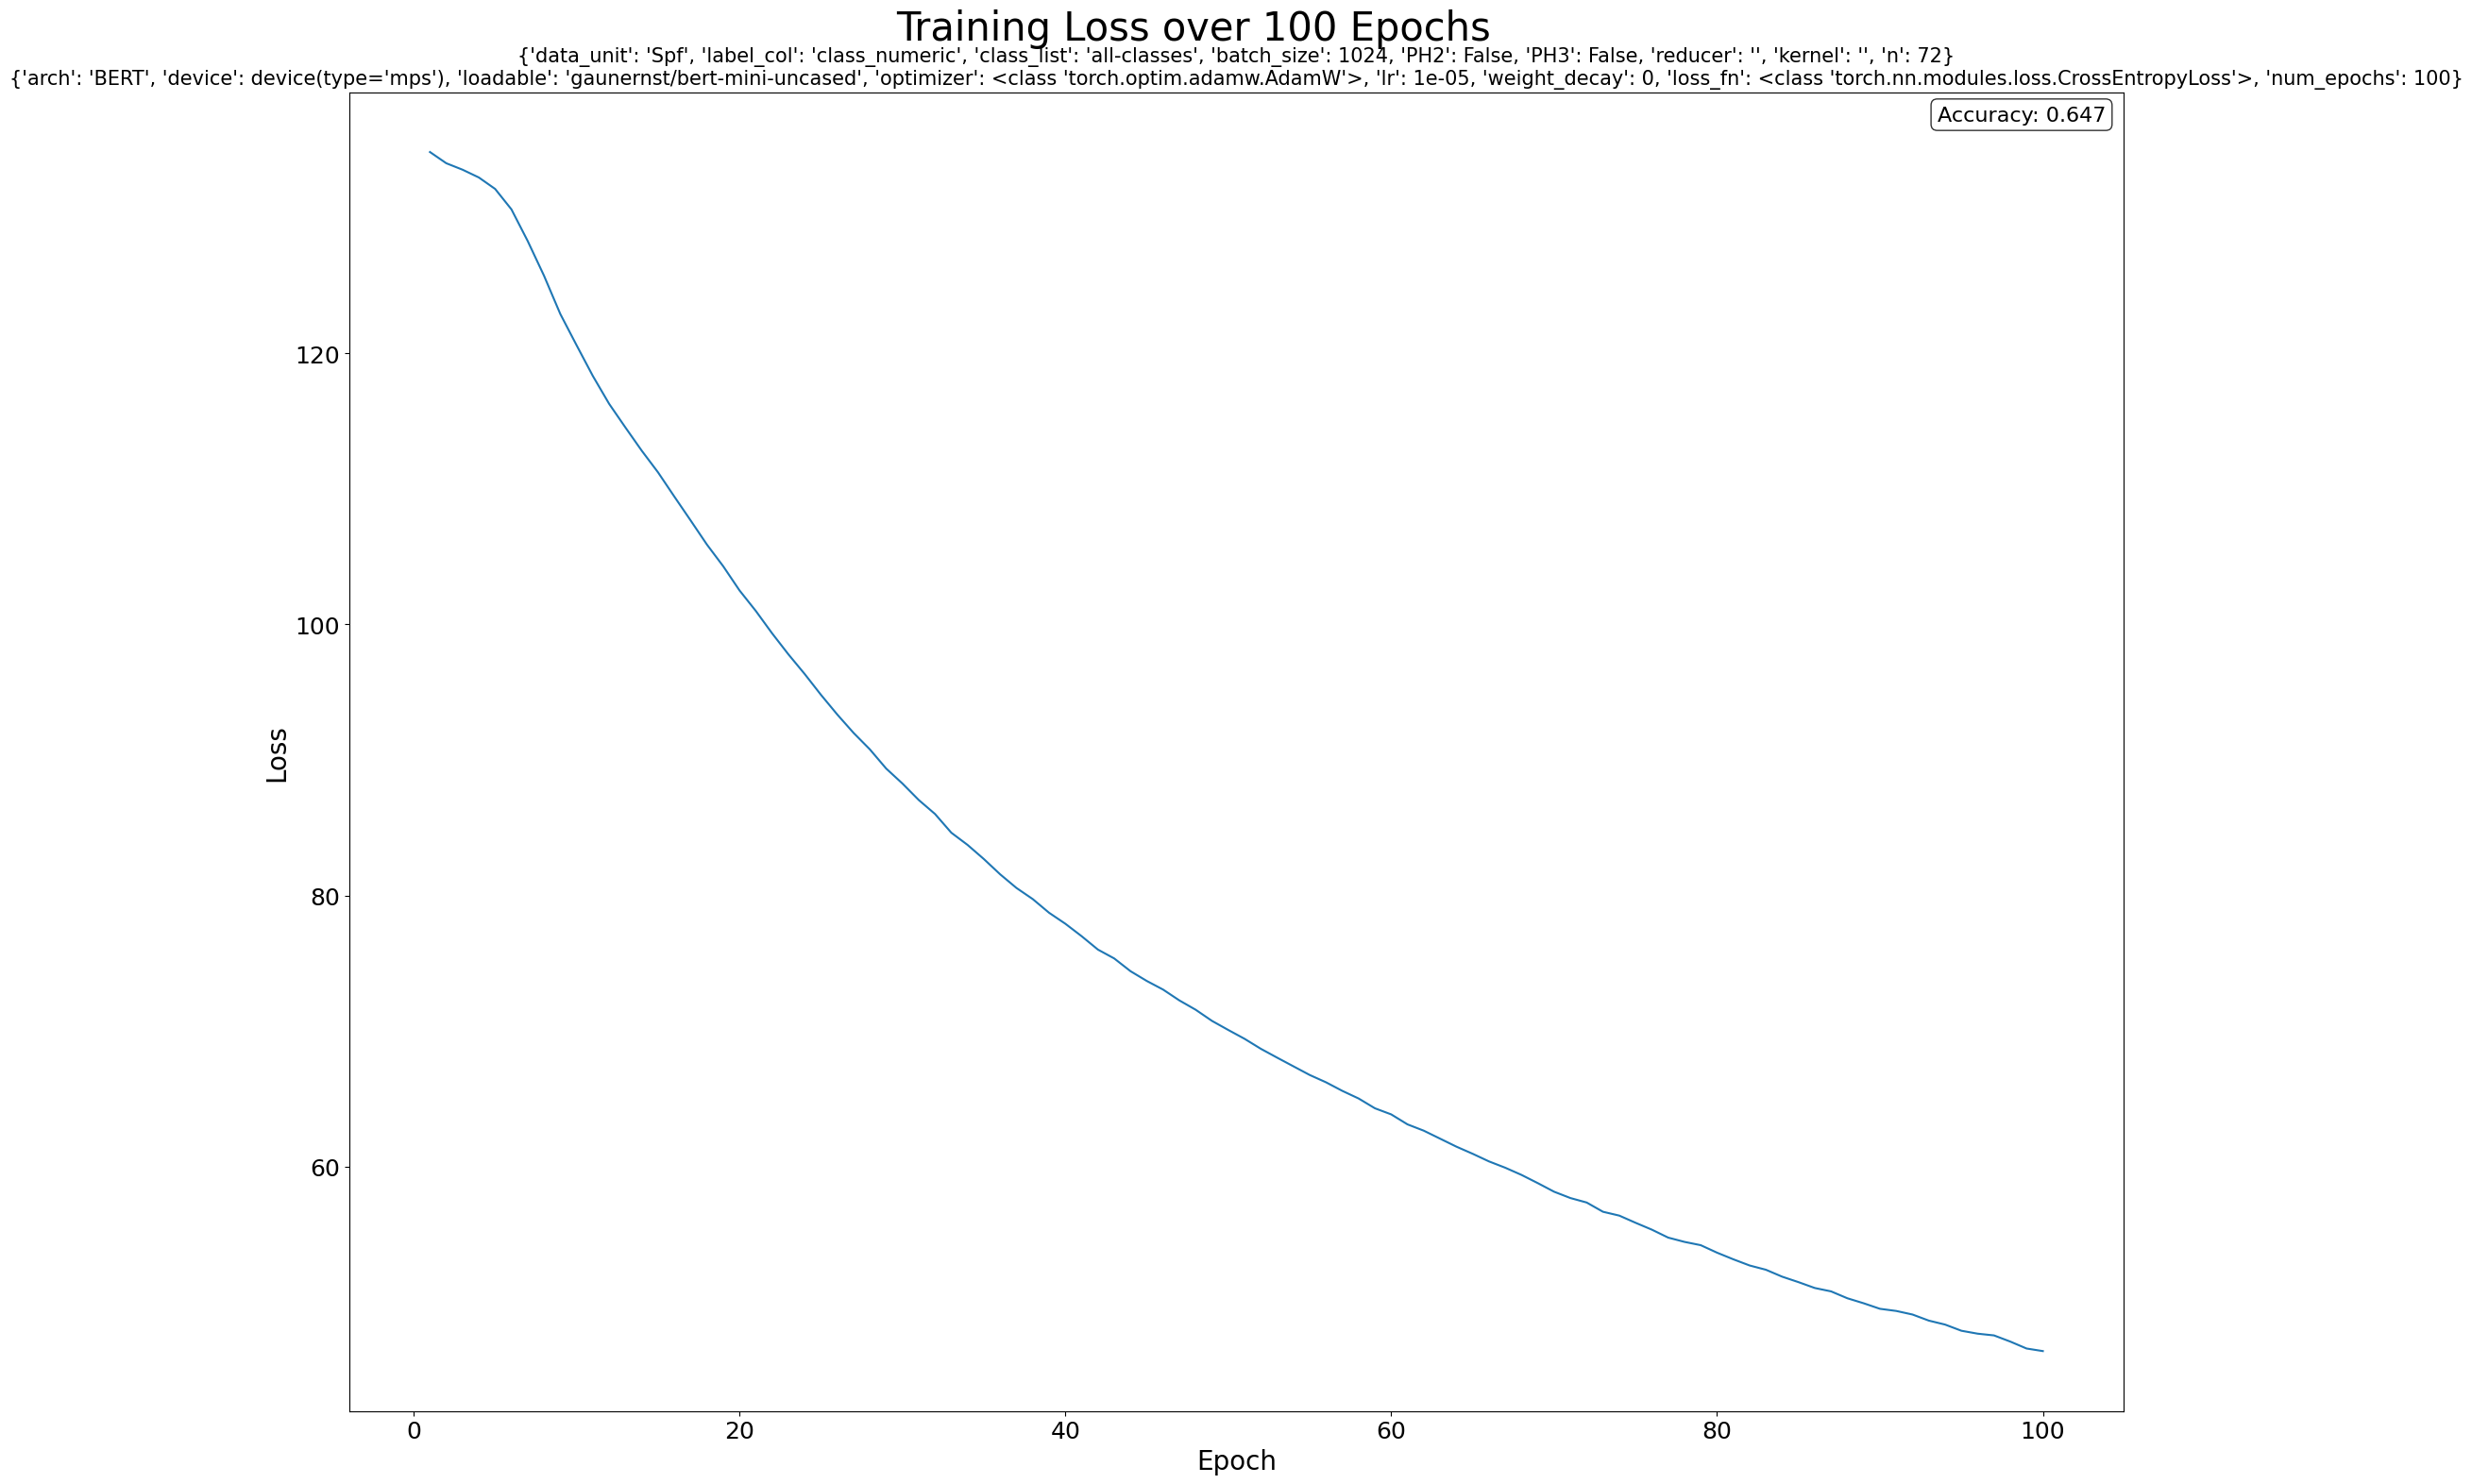

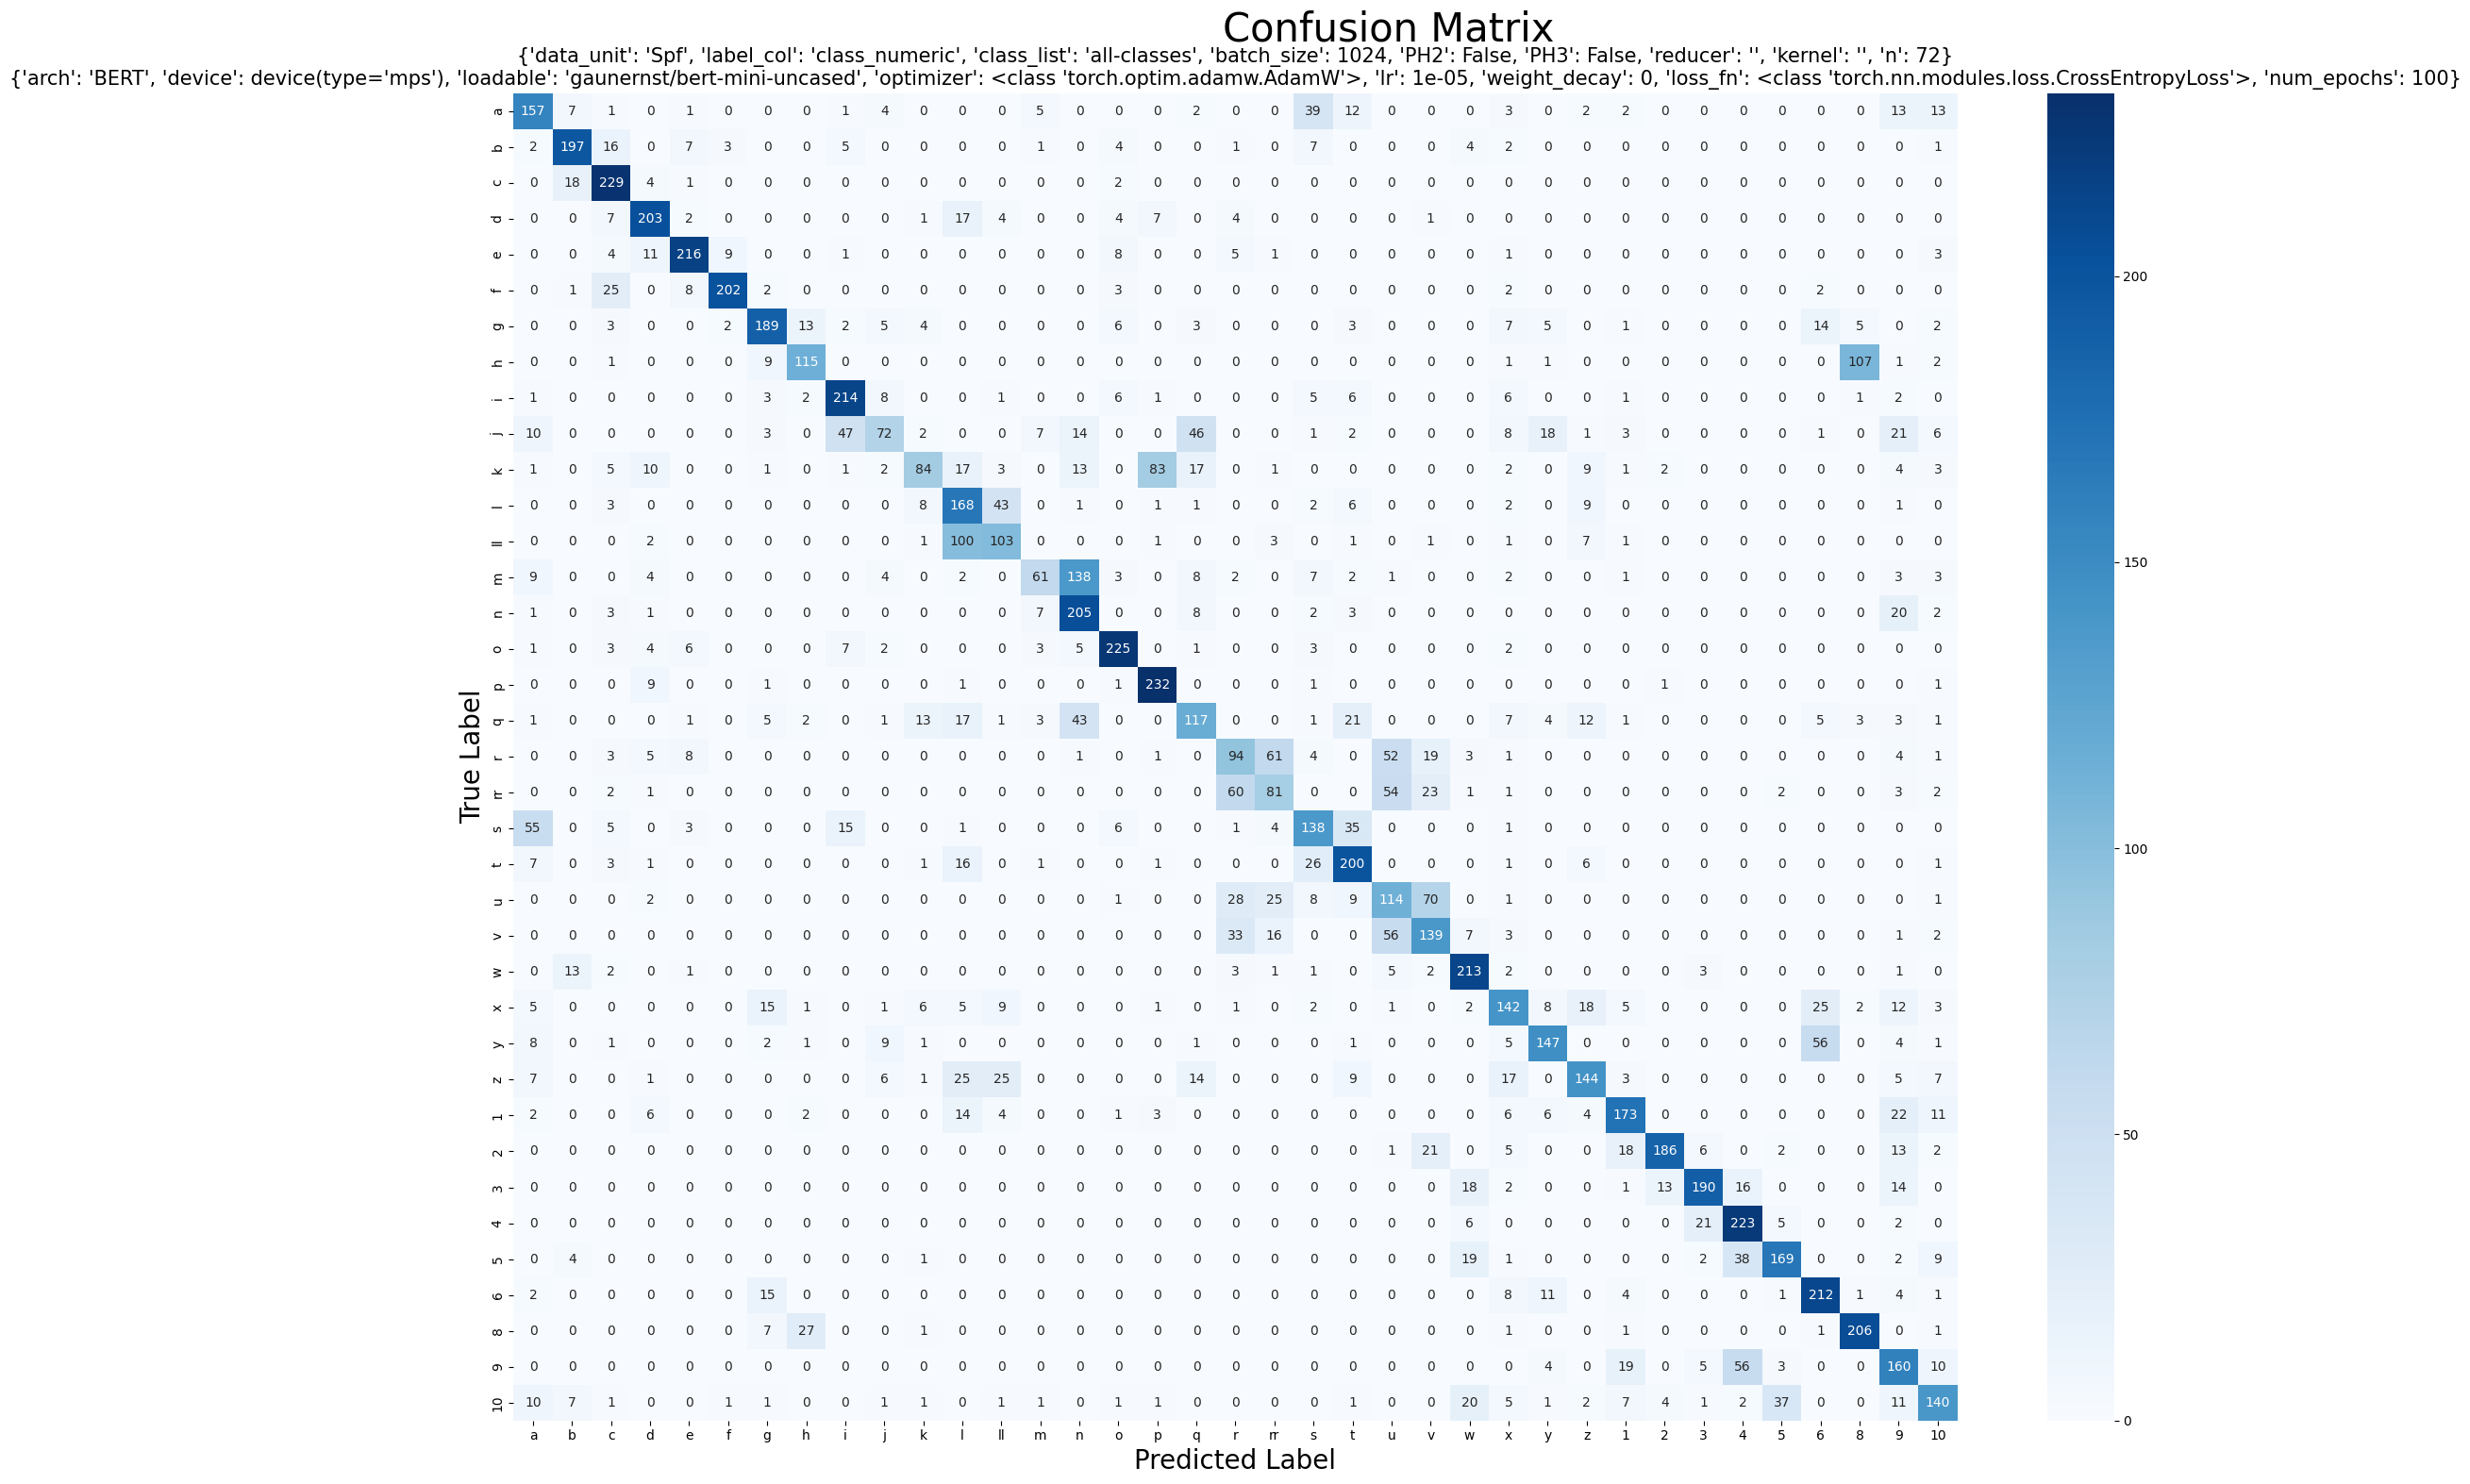

In [ ]:
print(model.accuracy)
print(model.top2accuracy)
print(model.macro_f1)
print(model.macro_precision)
print(model.macro_recall)

model.show_loss()
model.show_confusion_matrix()

In [ ]:
model.keep()
#bert.clean_bert()

In [ ]:
from INFERENCE import live

I0000 00:00:1750634087.299071 7908346 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750634087.306493 7909843 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750634087.312449 7909843 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1750634087.314300 7908346 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3 Pro
W0000 00:00:1750634087.378802 7909852 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750634087.386314 7909861 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for fe

In [ ]:
model.me.to('cpu')
live.classify_webcam_image(model)


2025-06-22 17:14:58.689 python[16685:7908346] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
W0000 00:00:1750634099.946186 7909846 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
d
rr
rr
rr
rr
rr
rr
rr
rr
d
rr
d
d
d
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
ll
d
d
d
d
ll
ll
ll
ll
ll
d
d
d
ll
ll
ll
ll
ll
ll
ll
ll
ll
z
z
z
